In [1]:
import xarray as xr
import numpy as np
import xrft
from xgcm.grid import Grid
from dask.diagnostics import ProgressBar
from matplotlib import pyplot as plt
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 14})
from glob import glob
from pyresample.bilinear import NumpyBilinearResampler
from pyresample import geometry
from matplotlib.colors import LogNorm


In [2]:
dsA = xr.open_zarr('/swot/SUM02/spencer/daily_filt/two_weeksA.zarr')
dsB = xr.open_zarr('/swot/SUM02/spencer/daily_filt/two_weeksB.zarr')

In [3]:
dsA=dsA.drop_vars('time')
dsA['time']=dsA['time']*3600
dsB=dsB.drop_vars('time')
dsB['time']=dsB['time']*3600

In [4]:
fA = 2*2*np.pi/24/3600*np.sin(dsA.y0*np.pi/180)
fB = 2*2*np.pi/24/3600*np.sin(dsB.y0*np.pi/180)

In [5]:
def lanczos(x, a):
    return np.sinc(x/a)
def sinc2(x, a):
    return np.sinc(x/a)

window_width=72
weight = xr.DataArray(sinc2(np.expand_dims(np.arange(-window_width/2,window_width/2),1),np.expand_dims(np.pi/fA.values/3600*1.1,0)), dims=['window','j'])
#weight = xr.DataArray(sinc2(np.arange(-window_width/2,window_width/2), window_width/2), dims=['window'])
nofiles=168
u_eul_filteredA = dsA.unfiltered_u.chunk({'time':-1}).rolling(time=window_width, center=True).construct('window').dot(weight,dims='window')/weight.sum('window')
v_eul_filteredA = dsA.unfiltered_v.chunk({'time':-1}).rolling(time=window_width, center=True).construct('window').dot(weight,dims='window')/weight.sum('window')
ssh_eul_filteredA = dsA.unfiltered_steric_ssh.chunk({'time':-1}).rolling(time=window_width, center=True).construct('window').dot(weight,dims='window')/weight.sum('window')
u_eul_filteredA = u_eul_filteredA.isel(time=slice(44,44+nofiles)).assign_coords({'time':np.arange(0,nofiles)*3600})
v_eul_filteredA = v_eul_filteredA.isel(time=slice(44,44+nofiles)).assign_coords({'time':np.arange(0,nofiles)*3600})
ssh_eul_filteredA = ssh_eul_filteredA.isel(time=slice(44,44+nofiles)).assign_coords({'time':np.arange(0,nofiles)*3600})

weight = xr.DataArray(sinc2(np.expand_dims(np.arange(-window_width/2,window_width/2),1),np.expand_dims(np.pi/fB.values/3600*1.1,0)), dims=['window','j'])
#weight = xr.DataArray(sinc2(np.arange(-window_width/2,window_width/2), window_width/2), dims=['window'])
nofiles=168
u_eul_filteredB = dsB.unfiltered_u.chunk({'time':-1}).rolling(time=window_width, center=True).construct('window').dot(weight,dims='window')/weight.sum('window')
v_eul_filteredB = dsB.unfiltered_v.chunk({'time':-1}).rolling(time=window_width, center=True).construct('window').dot(weight,dims='window')/weight.sum('window')
ssh_eul_filteredB = dsB.unfiltered_steric_ssh.chunk({'time':-1}).rolling(time=window_width, center=True).construct('window').dot(weight,dims='window')/weight.sum('window')
u_eul_filteredB = u_eul_filteredB.isel(time=slice(44,44+nofiles)).assign_coords({'time':np.arange(0,nofiles)*3600})
v_eul_filteredB = v_eul_filteredB.isel(time=slice(44,44+nofiles)).assign_coords({'time':np.arange(0,nofiles)*3600})
ssh_eul_filteredB = ssh_eul_filteredB.isel(time=slice(44,44+nofiles)).assign_coords({'time':np.arange(0,nofiles)*3600})

In [6]:
u_lag_filteredA = dsA.lagfiltered_u.isel(time=slice(44,44+nofiles))
v_lag_filteredA = dsA.lagfiltered_v.isel(time=slice(44,44+nofiles))
ssh_lag_filteredA = dsA.lagfiltered_ssh.isel(time=slice(44,44+nofiles))

u_unfilteredA = dsA.unfiltered_u.isel(time=slice(44,44+nofiles))
v_unfilteredA = dsA.unfiltered_v.isel(time=slice(44,44+nofiles))
ssh_unfilteredA = dsA.unfiltered_steric_ssh.isel(time=slice(44,44+nofiles))

u_lag_filteredB = dsB.lagfiltered_u.isel(time=slice(44,44+nofiles))
v_lag_filteredB = dsB.lagfiltered_v.isel(time=slice(44,44+nofiles))
ssh_lag_filteredB = dsB.lagfiltered_ssh.isel(time=slice(44,44+nofiles))

u_unfilteredB = dsB.unfiltered_u.isel(time=slice(44,44+nofiles))
v_unfilteredB = dsB.unfiltered_v.isel(time=slice(44,44+nofiles))
ssh_unfilteredB = dsB.unfiltered_steric_ssh.isel(time=slice(44,44+nofiles))

In [8]:
u_eul_filteredA = u_eul_filteredA.assign_coords(x0=("i", dsA.x0.values)).swap_dims({"i": "x0"})
u_eul_filteredA = u_eul_filteredA.assign_coords(y0=("j", dsA.y0.values)).swap_dims({"j": "y0"})
v_eul_filteredA = v_eul_filteredA.assign_coords(x0=("i", dsA.x0.values)).swap_dims({"i": "x0"})
v_eul_filteredA = v_eul_filteredA.assign_coords(y0=("j", dsA.y0.values)).swap_dims({"j": "y0"})
ssh_eul_filteredA = ssh_eul_filteredA.assign_coords(x0=("i", dsA.x0.values)).swap_dims({"i": "x0"})
ssh_eul_filteredA = ssh_eul_filteredA.assign_coords(y0=("j", dsA.y0.values)).swap_dims({"j": "y0"})
u_lag_filteredA = u_lag_filteredA.swap_dims({"i": "x0"})
u_lag_filteredA = u_lag_filteredA.swap_dims({"j": "y0"})
v_lag_filteredA = v_lag_filteredA.swap_dims({"i": "x0"})
v_lag_filteredA = v_lag_filteredA.swap_dims({"j": "y0"})
u_unfilteredA = u_unfilteredA.swap_dims({"i": "x0"})
u_unfilteredA = u_unfilteredA.swap_dims({"j": "y0"})
v_unfilteredA = v_unfilteredA.swap_dims({"i": "x0"})
v_unfilteredA = v_unfilteredA.swap_dims({"j": "y0"})

ssh_lag_filteredA = ssh_lag_filteredA.swap_dims({"i": "x0"})
ssh_lag_filteredA = ssh_lag_filteredA.swap_dims({"j": "y0"})
ssh_unfilteredA = ssh_unfilteredA.swap_dims({"i": "x0"})
ssh_unfilteredA = ssh_unfilteredA.swap_dims({"j": "y0"})

u_eul_filteredB = u_eul_filteredB.assign_coords(x0=("i", dsB.x0.values)).swap_dims({"i": "x0"})
u_eul_filteredB = u_eul_filteredB.assign_coords(y0=("j", dsB.y0.values)).swap_dims({"j": "y0"})
v_eul_filteredB = v_eul_filteredB.assign_coords(x0=("i", dsB.x0.values)).swap_dims({"i": "x0"})
v_eul_filteredB = v_eul_filteredB.assign_coords(y0=("j", dsB.y0.values)).swap_dims({"j": "y0"})
ssh_eul_filteredB = ssh_eul_filteredB.assign_coords(x0=("i", dsB.x0.values)).swap_dims({"i": "x0"})
ssh_eul_filteredB = ssh_eul_filteredB.assign_coords(y0=("j", dsB.y0.values)).swap_dims({"j": "y0"})
u_lag_filteredB = u_lag_filteredB.swap_dims({"i": "x0"})
u_lag_filteredB = u_lag_filteredB.swap_dims({"j": "y0"})
v_lag_filteredB = v_lag_filteredB.swap_dims({"i": "x0"})
v_lag_filteredB = v_lag_filteredB.swap_dims({"j": "y0"})
u_unfilteredB = u_unfilteredB.swap_dims({"i": "x0"})
u_unfilteredB = u_unfilteredB.swap_dims({"j": "y0"})
v_unfilteredB = v_unfilteredB.swap_dims({"i": "x0"})
v_unfilteredB = v_unfilteredB.swap_dims({"j": "y0"})

ssh_lag_filteredB = ssh_lag_filteredB.swap_dims({"i": "x0"})
ssh_lag_filteredB = ssh_lag_filteredB.swap_dims({"j": "y0"})
ssh_unfilteredB = ssh_unfilteredB.swap_dims({"i": "x0"})
ssh_unfilteredB = ssh_unfilteredB.swap_dims({"j": "y0"})

In [9]:
xmina=900#region c:+500
xmaxa=-900#region c:+500

ymina=900#region c: +250
ymaxa=-900#region c: +250
lonsa, latsa = np.meshgrid(u_eul_filteredA.x0.values, u_eul_filteredA.y0.values)

xminb=900+500#region c:+500
xmaxb=-900+500#region c:+500

yminb=900+250#region c: +250
ymaxb=-900+250#region c: +250
lonsb, latsb = np.meshgrid(u_eul_filteredB.x0.values, u_eul_filteredB.y0.values)

In [10]:
def target_area_def_a(ds_patch,variable_name):
    """Get a pyresample area_def for a given patch."""
    center_point = ds_patch.isel(x0=ds_patch.x0.size//2, y0=ds_patch.y0.size//2)
    center_lon, center_lat =center_point.x0.values.item(),-center_point.y0.values.item()#region b:3,32 # region c: 17,40
    #region a: center_point.x0.values.item(),-center_point.y0.values.item()
    area_id = 'local_grid'
    description = 'Local Lambert Equal Area Grid'
    proj_id = 'local_grid'
    proj_dict = {'proj': 'laea', 'lon_0': center_lon, 'lat_0': center_lat,'units': 'm'} #  'a': 6371228.0,

    # 1 km resolution
    width = 512#2160
    height = 512#2160

    # 512 x 512 km
    area_extent = (-270000., -270000., 270000., 270000.)
    area_def = geometry.AreaDefinition(area_id, description, proj_id, proj_dict,
                                       width, height, area_extent)
    return area_def

def target_area_def_b(ds_patch,variable_name):
    """Get a pyresample area_def for a given patch."""
    center_point = ds_patch.isel(x0=ds_patch.x0.size//2, y0=ds_patch.y0.size//2)
    center_lon, center_lat =17,40#center_point.x0.values.item(),-center_point.y0.values.item()#region b:3,32 # region c: 17,40
    #region a: center_point.x0.values.item(),-center_point.y0.values.item()
    area_id = 'local_grid'
    description = 'Local Lambert Equal Area Grid'
    proj_id = 'local_grid'
    proj_dict = {'proj': 'laea', 'lon_0': center_lon, 'lat_0': center_lat,'units': 'm'} #  'a': 6371228.0,

    # 1 km resolution
    width = 512#2160
    height = 512#2160

    # 512 x 512 km
    area_extent = (-270000., -270000., 270000., 270000.)
    area_def = geometry.AreaDefinition(area_id, description, proj_id, proj_dict,
                                       width, height, area_extent)
    return area_def



def resample_transposed(data, resampler):
    return np.transpose(resampler.resample(data), (2, 0, 1))

def ufunc_resample_a(data):
    target_def = target_area_def_a(data.isel(time=0),'U')
    source_def = geometry.SwathDefinition(lons=lonsa, lats=-latsa)
    resampler = NumpyBilinearResampler(source_def, target_def, 30e3)
    resampled = xr.apply_ufunc(resample_transposed,data,resampler,input_core_dims=[['y0','x0'],['y0','x0']],output_core_dims=[['y1','x1']])
    return resampled

def ufunc_resample_b(data):
    target_def = target_area_def_b(data.isel(time=0),'U')
    source_def = geometry.SwathDefinition(lons=lonsb, lats=-latsb)
    resampler = NumpyBilinearResampler(source_def, target_def, 30e3)
    resampled = xr.apply_ufunc(resample_transposed,data,resampler,input_core_dims=[['y0','x0'],['y0','x0']],output_core_dims=[['y1','x1']])
    return resampled

In [11]:
x_resampleda = ufunc_resample_a((u_eul_filteredA.x0*xr.ones_like(u_eul_filteredA.isel(time=slice(0,10)))).load().T)
y_resampleda = ufunc_resample_a((u_eul_filteredA.y0*xr.ones_like(u_eul_filteredA.isel(time=slice(0,10)))).load().T)

x_resampledb = ufunc_resample_b((u_eul_filteredB.x0*xr.ones_like(u_eul_filteredB.isel(time=slice(0,10)))).load().T)
y_resampledb = ufunc_resample_b((u_eul_filteredB.y0*xr.ones_like(u_eul_filteredB.isel(time=slice(0,10)))).load().T)

/home/spencerj/.conda/envs/pangeo2/lib/python3.7/site-packages/pyproj/crs/crs.py:543: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()
/home/spencerj/.conda/envs/pangeo2/lib/python3.7/site-packages/pyproj/crs/crs.py:543: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()
/home/spencerj/.conda/envs/pangeo2/lib/python3.7/site-packages/pyproj/crs/crs.py:543: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = se

In [12]:
u_eul_resampleda = ufunc_resample_a(u_eul_filteredA.load())
v_eul_resampleda = ufunc_resample_a(v_eul_filteredA.load())
u_resampleda = ufunc_resample_a(u_lag_filteredA.load())
v_resampleda = ufunc_resample_a(v_lag_filteredA.load())
u_resampled_unfilta = ufunc_resample_a(u_unfilteredA.load())
v_resampled_unfilta = ufunc_resample_a(v_unfilteredA.load())

eta_resampled_unfilta = ufunc_resample_a(ssh_unfilteredA.load())
eta_resampleda = ufunc_resample_a(ssh_lag_filteredA.load())
eta_eul_resampleda = ufunc_resample_a(ssh_eul_filteredA.load())


u_eul_resampledb = ufunc_resample_b(u_eul_filteredB.load())
v_eul_resampledb = ufunc_resample_b(v_eul_filteredB.load())
u_resampledb = ufunc_resample_b(u_lag_filteredB.load())
v_resampledb = ufunc_resample_b(v_lag_filteredB.load())
u_resampled_unfiltb = ufunc_resample_b(u_unfilteredB.load())
v_resampled_unfiltb = ufunc_resample_b(v_unfilteredB.load())

eta_resampled_unfiltb = ufunc_resample_b(ssh_unfilteredB.load())
eta_resampledb = ufunc_resample_b(ssh_lag_filteredB.load())
eta_eul_resampledb = ufunc_resample_b(ssh_eul_filteredB.load())

/home/spencerj/.conda/envs/pangeo2/lib/python3.7/site-packages/pyproj/crs/crs.py:543: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()
/home/spencerj/.conda/envs/pangeo2/lib/python3.7/site-packages/pyproj/crs/crs.py:543: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = self.to_proj4()
/home/spencerj/.conda/envs/pangeo2/lib/python3.7/site-packages/pyproj/crs/crs.py:543: UserWarning: You will likely lose important projection information when converting to a PROJ string from another format. See: https://proj.org/faq.html#what-is-the-best-format-for-describing-coordinate-reference-systems
  proj_string = se

In [13]:
u_eul_resampleda = u_eul_resampleda.assign_coords(x1=("x1", u_eul_resampleda.x1.values)).assign_coords(y1=("y1", u_eul_resampleda.y1.values))
v_eul_resampleda = v_eul_resampleda.assign_coords(x1=("x1", v_eul_resampleda.x1.values)).assign_coords(y1=("y1", v_eul_resampleda.y1.values))
eta_eul_resampleda = eta_eul_resampleda.assign_coords(x1=("x1", v_eul_resampleda.x1.values)).assign_coords(y1=("y1", v_eul_resampleda.y1.values))
u_resampleda = u_resampleda.assign_coords(x1=("x1", u_resampleda.x1.values)).assign_coords(y1=("y1", u_resampleda.y1.values))
v_resampleda = v_resampleda.assign_coords(x1=("x1", v_resampleda.x1.values)).assign_coords(y1=("y1", v_resampleda.y1.values))
eta_resampleda = eta_resampleda.assign_coords(x1=("x1", v_resampleda.x1.values)).assign_coords(y1=("y1", v_resampleda.y1.values))
u_resampled_unfilta = u_resampled_unfilta.assign_coords(x1=("x1", u_resampled_unfilta.x1.values)).assign_coords(y1=("y1", u_resampled_unfilta.y1.values))
v_resampled_unfilta = v_resampled_unfilta.assign_coords(x1=("x1", v_resampled_unfilta.x1.values)).assign_coords(y1=("y1", v_resampled_unfilta.y1.values))
eta_resampled_unfilta = eta_resampled_unfilta.assign_coords(x1=("x1", v_resampled_unfilta.x1.values)).assign_coords(y1=("y1", v_resampled_unfilta.y1.values))

u_eul_resampledb = u_eul_resampledb.assign_coords(x1=("x1", u_eul_resampledb.x1.values)).assign_coords(y1=("y1", u_eul_resampledb.y1.values))
v_eul_resampledb = v_eul_resampledb.assign_coords(x1=("x1", v_eul_resampledb.x1.values)).assign_coords(y1=("y1", v_eul_resampledb.y1.values))
eta_eul_resampledb = eta_eul_resampledb.assign_coords(x1=("x1", eta_eul_resampledb.x1.values)).assign_coords(y1=("y1", eta_eul_resampledb.y1.values))
u_resampledb = u_resampledb.assign_coords(x1=("x1", u_resampledb.x1.values)).assign_coords(y1=("y1", u_resampledb.y1.values))
v_resampledb = v_resampledb.assign_coords(x1=("x1", v_resampledb.x1.values)).assign_coords(y1=("y1", v_resampledb.y1.values))
eta_resampledb = eta_resampledb.assign_coords(x1=("x1", eta_resampledb.x1.values)).assign_coords(y1=("y1", eta_resampledb.y1.values))
u_resampled_unfiltb = u_resampled_unfiltb.assign_coords(x1=("x1", u_resampled_unfiltb.x1.values)).assign_coords(y1=("y1", u_resampled_unfiltb.y1.values))
v_resampled_unfiltb = v_resampled_unfiltb.assign_coords(x1=("x1", v_resampled_unfiltb.x1.values)).assign_coords(y1=("y1", v_resampled_unfiltb.y1.values))
eta_resampled_unfiltb = eta_resampled_unfiltb.assign_coords(x1=("x1", eta_resampled_unfiltb.x1.values)).assign_coords(y1=("y1", eta_resampled_unfiltb.y1.values))

In [14]:
with ProgressBar():
    u2_psa = xrft.power_spectrum(u_resampleda, dim=['x1','y1','time'],window=True,window_correction=True).compute()
    v2_psa = xrft.power_spectrum(v_resampleda, dim=['x1','y1','time'],window=True,window_correction=True).compute()
    eta_psa = xrft.power_spectrum(eta_resampleda, dim=['x1','y1','time'],window=True,window_correction=True).compute()
    u2_psb = xrft.power_spectrum(u_resampledb, dim=['x1','y1','time'],window=True,window_correction=True).compute()
    v2_psb = xrft.power_spectrum(v_resampledb, dim=['x1','y1','time'],window=True,window_correction=True).compute()
    eta_psb = xrft.power_spectrum(eta_resampledb, dim=['x1','y1','time'],window=True,window_correction=True).compute()
vel_psa = (u2_psa + v2_psa)*0.5
vel_psb = (u2_psb + v2_psb)*0.5

/home/spencerj/.conda/envs/pangeo2/lib/python3.7/site-packages/xrft/xrft.py:51: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  FutureWarning,
/home/spencerj/.conda/envs/pangeo2/lib/python3.7/site-packages/xrft/xrft.py:51: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  FutureWarning,
/home/spencerj/.conda/envs/pangeo2/lib/python3.7/site-packages/xrft/xrft.py:51: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  FutureWarning,
/home/spencerj/.conda/envs/pangeo2/lib/python3.7/site-packages/xrft/xrft.py:51: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  FutureWarning,
/home/spencerj/.conda/envs/pangeo2/lib/python3.7

In [15]:
with ProgressBar():
    u2_ps_unfilta = xrft.power_spectrum(u_resampled_unfilta, dim=['x1','y1','time'],window=True,window_correction=True).compute()
    v2_ps_unfilta = xrft.power_spectrum(v_resampled_unfilta, dim=['x1','y1','time'],window=True,window_correction=True).compute()
    eta_ps_unfilta = xrft.power_spectrum(eta_resampled_unfilta, dim=['x1','y1','time'],window=True,window_correction=True).compute()
    u2_ps_unfiltb = xrft.power_spectrum(u_resampled_unfiltb, dim=['x1','y1','time'],window=True,window_correction=True).compute()
    v2_ps_unfiltb = xrft.power_spectrum(v_resampled_unfiltb, dim=['x1','y1','time'],window=True,window_correction=True).compute()
    eta_ps_unfiltb = xrft.power_spectrum(eta_resampled_unfiltb, dim=['x1','y1','time'],window=True,window_correction=True).compute()
vel_ps_unfilta = (u2_ps_unfilta + v2_ps_unfilta)*0.5
vel_ps_unfiltb = (u2_ps_unfiltb + v2_ps_unfiltb)*0.5

/home/spencerj/.conda/envs/pangeo2/lib/python3.7/site-packages/xrft/xrft.py:51: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  FutureWarning,
/home/spencerj/.conda/envs/pangeo2/lib/python3.7/site-packages/xrft/xrft.py:51: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  FutureWarning,
/home/spencerj/.conda/envs/pangeo2/lib/python3.7/site-packages/xrft/xrft.py:51: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  FutureWarning,
/home/spencerj/.conda/envs/pangeo2/lib/python3.7/site-packages/xrft/xrft.py:51: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  FutureWarning,
/home/spencerj/.conda/envs/pangeo2/lib/python3.7

In [16]:
with ProgressBar():
    u2_ps_eula = xrft.power_spectrum(u_eul_resampleda, dim=['x1','y1','time'],window=True,window_correction=True).compute()
    v2_ps_eula = xrft.power_spectrum(v_eul_resampleda, dim=['x1','y1','time'],window=True,window_correction=True).compute()
    eta_ps_eula = xrft.power_spectrum(eta_eul_resampleda, dim=['x1','y1','time'],window=True,window_correction=True).compute()
    u2_ps_eulb = xrft.power_spectrum(u_eul_resampledb, dim=['x1','y1','time'],window=True,window_correction=True).compute()
    v2_ps_eulb = xrft.power_spectrum(v_eul_resampledb, dim=['x1','y1','time'],window=True,window_correction=True).compute()
    eta_ps_eulb = xrft.power_spectrum(eta_eul_resampledb, dim=['x1','y1','time'],window=True,window_correction=True).compute()
vel_ps_eula = (u2_ps_eula + v2_ps_eula)*0.5
vel_ps_eulb = (u2_ps_eulb + v2_ps_eulb)*0.5

/home/spencerj/.conda/envs/pangeo2/lib/python3.7/site-packages/xrft/xrft.py:51: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  FutureWarning,
/home/spencerj/.conda/envs/pangeo2/lib/python3.7/site-packages/xrft/xrft.py:51: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  FutureWarning,
/home/spencerj/.conda/envs/pangeo2/lib/python3.7/site-packages/xrft/xrft.py:51: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  FutureWarning,
/home/spencerj/.conda/envs/pangeo2/lib/python3.7/site-packages/xrft/xrft.py:51: FutureWarning: Please provide the name of window adhering to scipy.signal.windows. The boolean option will be deprecated in future releases.
  FutureWarning,
/home/spencerj/.conda/envs/pangeo2/lib/python3.7

In [17]:
v_eul_resampledb.isel(time=150)

<xarray.DataArray (y1: 512, x1: 512)>
array([[ 0.02709001,  0.03133786,  0.04259106, ...,  0.18006045,
         0.19957424,  0.21877467],
       [ 0.02222719,  0.0264352 ,  0.04165058, ...,  0.17312787,
         0.19293291,  0.21393835],
       [ 0.02095902,  0.02727506,  0.04123651, ...,  0.16577004,
         0.18599634,  0.20729991],
       ...,
       [-0.10112838, -0.13530717, -0.16924507, ...,  0.06818648,
         0.05236458,  0.03341138],
       [-0.08637712, -0.12069584, -0.15442165, ...,  0.11798647,
         0.10680443,  0.08969509],
       [-0.0725592 , -0.10687967, -0.14029898, ...,  0.16125266,
         0.15661488,  0.14496699]])
Coordinates:
    k        int64 0
    z0       float64 -0.5
    time     int64 540000
  * x1       (x1) int64 0 1 2 3 4 5 6 7 8 ... 504 505 506 507 508 509 510 511
  * y1       (y1) int64 0 1 2 3 4 5 6 7 8 ... 504 505 506 507 508 509 510 511

In [19]:
#for torres filter, we should actually compute the fourier transform first
fm = 2*2*np.pi/24/3600*np.sin(-43*np.pi/180)
with ProgressBar():
    u2_xs_unfilta = xrft.dft(u_resampled_unfilta.drop_vars('time'), dim=['x1','y1','time'],window=True).compute()#,window=True,window_correction=True
    v2_xs_unfilta = xrft.dft(v_resampled_unfilta.drop_vars('time'), dim=['x1','y1','time'],window=True).compute()
    u2_xs_unfiltb = xrft.dft(u_resampled_unfiltb.drop_vars('time'), dim=['x1','y1','time'],window=True).compute()#,window=True,window_correction=True
    v2_xs_unfiltb = xrft.dft(v_resampled_unfiltb.drop_vars('time'), dim=['x1','y1','time'],window=True).compute()
kx = v2_xs_unfilta.freq_x1
ky = v2_xs_unfilta.freq_y1
kr = np.sqrt(kx**2+ky**2)
omegaM = np.nan*np.ones([kr.shape[0], kr.shape[1], 11])
for i in range(1,11):
    Kdi = 1/dsA.Rossby_radius[i]
    omegaM[:,:,i] = (fm**2*(1+ (kr/1000*4*np.pi)**2/Kdi**2).values)**0.5*3600
u2_xs_tofilta = u2_xs_unfilta.where(np.abs(u2_xs_unfilta.freq_time)*xr.ones_like(u2_xs_unfilta)<omegaM[:,:,10]/np.pi/2)
v2_xs_tofilta = v2_xs_unfilta.where(np.abs(v2_xs_unfilta.freq_time)*xr.ones_like(v2_xs_unfilta)<omegaM[:,:,10]/np.pi/2)
u2_xs_tofiltb = u2_xs_unfiltb.where(np.abs(u2_xs_unfiltb.freq_time)*xr.ones_like(u2_xs_unfiltb)<omegaM[:,:,10]/np.pi/2)
v2_xs_tofiltb = v2_xs_unfiltb.where(np.abs(v2_xs_unfiltb.freq_time)*xr.ones_like(v2_xs_unfiltb)<omegaM[:,:,10]/np.pi/2)
windows,_ = xrft.xrft._apply_window(u_eul_resampleda, dims=['x1','y1','time'])
vel_ps_eul_torresa = (np.abs(u2_xs_tofilta)**2 + np.abs(v2_xs_tofilta)**2)*0.5/(windows**2).mean()/5825.42222222
vel_ps_eul_torresb = (np.abs(u2_xs_tofiltb)**2 + np.abs(v2_xs_tofiltb)**2)*0.5/(windows**2).mean()/5825.42222222

In [20]:
# Add the isotropic calculation (k,l) -> (k_r) (azimuthally average)
def azimuthal_avg(k, l, f, N, nfactor):
    """
    Takes the azimuthal average of a given field.
    """
    k = k.values; l = l.values
    kk, ll = np.meshgrid(k, l)
    K = np.sqrt(kk**2 + ll**2)
    nbins = int(N/nfactor)
    if k.max() > l.max():
        ki = np.linspace(0., l.max(), nbins)
    else:
        ki = np.linspace(0., k.max(), nbins)

    kidx = np.digitize(np.ravel(K), ki)
    area = np.bincount(kidx)

    kr = np.bincount(kidx, weights=K.ravel()) / area

    if f.ndim == 2:
        iso_f = np.ma.masked_invalid(np.bincount(kidx,
                                    weights=f.data.ravel())
                                    / area) * kr
    else:
        raise ValueError('The data has too many or few dimensions. '
                        'The input should only have the two dimensions '
                        'to take the azimuthal averaging over.')

    return kr, iso_f

def iso_spec_over_depth(ds):
    
    Zlen = len(ds.Z)
    klen = len(ds.freq_XC)
    omegalen = len(ds.freq_time)
    
    nfactor = 4. 
    ds_iso = np.zeros([omegalen , Zlen, int(klen/nfactor+1)])

    for j in range(0,omegalen):
        for i in range(0,Zlen):
            kr, ds_iso[j,i,:] = azimuthal_avg(ds.freq_XC, ds.freq_YC, ds.isel(Z=i, freq_time=j), 
                            len(ds.freq_XC), nfactor)
    kr[0] = 0.
    ds_iso_xr = xr.DataArray(ds_iso, coords={'freq_time':ds.freq_time.values, 'Z': ds.Z.values, 'kr':kr }, 
                             dims=['freq_time','Z', 'kr'])
    
    return ds_iso_xr

def iso_spec(ds):
    
    #Zlen = len(ds.Z)
    klen = len(ds.freq_x1)
    omegalen = len(ds.freq_time)
    
    nfactor = 4. 
    ds_iso = np.zeros([omegalen ,  int(klen/nfactor+1)])

    for j in range(0,omegalen):
            kr, ds_iso[j,:] = azimuthal_avg(ds.freq_x1, ds.freq_y1, ds.isel(freq_time=j), 
                            len(ds.freq_x1), nfactor)
    kr[0] = 0.
    ds_iso_xr = xr.DataArray(ds_iso, coords={'freq_time':ds.freq_time.values, 'kr':kr }, 
                             dims=['freq_time','kr'])
    
    return ds_iso_xr

In [21]:
ps_isoa = iso_spec(vel_psa)
ps_iso_unfilta = iso_spec(vel_ps_unfilta)
ps_iso_eula = iso_spec(vel_ps_eula)
ps_iso_torresa = iso_spec(vel_ps_eul_torresa)
eta_isoa = iso_spec(eta_psa)
eta_iso_unfilta = iso_spec(eta_ps_unfilta)
eta_iso_eula = iso_spec(eta_ps_eula)

ps_isob = iso_spec(vel_psb)
ps_iso_unfiltb = iso_spec(vel_ps_unfiltb)
ps_iso_eulb = iso_spec(vel_ps_eulb)
ps_iso_torresb = iso_spec(vel_ps_eul_torresb)
eta_isob = iso_spec(eta_psb)
eta_iso_unfiltb = iso_spec(eta_ps_unfiltb)
eta_iso_eulb = iso_spec(eta_ps_eulb)

/home/spencerj/.conda/envs/pangeo2/lib/python3.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in true_divide
/home/spencerj/.conda/envs/pangeo2/lib/python3.7/site-packages/ipykernel/__main__.py:23: RuntimeWarning: invalid value encountered in true_divide


In [23]:
kr    = ps_isoa.kr
omegaM = np.nan*np.ones([kr.shape[0], 11])
for i in range(1,11):
    
    Kdi = 1/dsA.Rossby_radius[i]
    omegaM[:,i] = (fm**2*(1+ (kr/1000*4*np.pi)**2/Kdi**2).values)**0.5*3600

/home/spencerj/.conda/envs/pangeo2/lib/python3.7/site-packages/ipykernel/__main__.py:101: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.


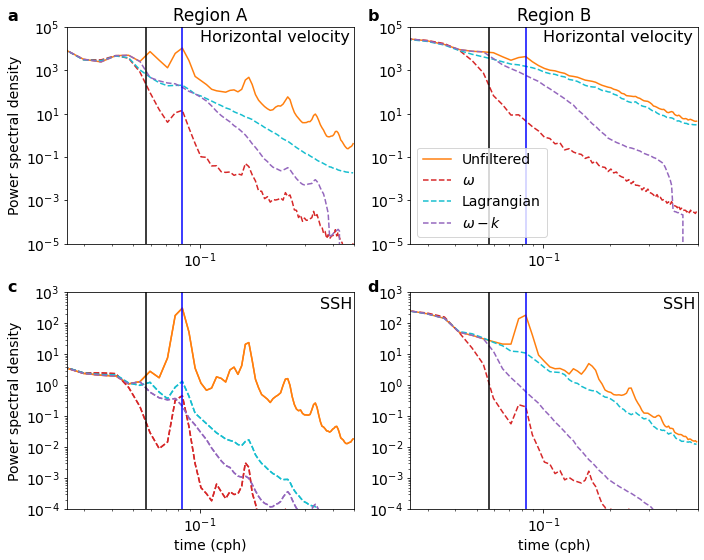

In [24]:
ps_iso_tofilta = ps_iso_unfilta
ps_iso_tofilta = ps_iso_tofilta.where(ps_iso_tofilta.freq_time*xr.ones_like(ps_iso_tofilta)*3600<omegaM[:,10]/np.pi/2)

plt.figure(figsize=(10,8))

plt.subplot(221)
ps_iso_unfilta.sum('kr').assign_coords(freq_time=ps_iso_unfilta.freq_time*3600).plot(c='tab:orange')
plt.xscale('log')
plt.yscale('log')

ps_iso_eula.sum('kr').assign_coords(freq_time=ps_iso_eula.freq_time*3600).plot(c='tab:red',linestyle ='--')
plt.xscale('log')
plt.yscale('log')

ps_isoa.sum('kr').assign_coords(freq_time=ps_isoa.freq_time*3600).plot(c='tab:cyan',linestyle ='--')
plt.xscale('log')
plt.yscale('log')

ps_iso_tofilta.sum('kr').assign_coords(freq_time=ps_iso_tofilta.freq_time*3600).plot(c='tab:purple',linestyle ='--')
plt.xscale('log')
plt.yscale('log')

ps_iso_tofiltb = ps_iso_unfiltb
ps_iso_tofiltb = ps_iso_tofiltb.where(ps_iso_tofiltb.freq_time*xr.ones_like(ps_iso_tofiltb)*3600<omegaM[:,10]/np.pi/2)

plt.ylim(10**-5,10**5)
plt.xlim(0.025,0.5)
plt.ylabel('Power spectral density')
plt.title('Region A')

plt.text(0.1, 2*10**4, 'Horizontal velocity', fontsize = 16)


plt.axvline([2/86400*3600],label='Semi-diurnal frequency',color='b')
plt.axvline([-fm/2/np.pi*3600],label='Inertial frequency',color='k')

#plt.legend(['Unfiltered','$\omega$','Lagrangian','$\omega-k$'],loc='lower left')

plt.tight_layout()
plt.xlabel('')

plt.gcf().text(0.02, 0.95, 'a', fontsize = 16,fontweight='bold')

plt.subplot(222)
ps_iso_unfiltb.sum('kr').assign_coords(freq_time=ps_iso_unfiltb.freq_time*3600).plot(c='tab:orange')
plt.xscale('log')
plt.yscale('log')

ps_iso_eulb.sum('kr').assign_coords(freq_time=ps_iso_eulb.freq_time*3600).plot(c='tab:red',linestyle ='--')
plt.xscale('log')
plt.yscale('log')

ps_isob.sum('kr').assign_coords(freq_time=ps_isob.freq_time*3600).plot(c='tab:cyan',linestyle ='--')
plt.xscale('log')
plt.yscale('log')

ps_iso_tofiltb.sum('kr').assign_coords(freq_time=ps_iso_tofiltb.freq_time*3600).plot(c='tab:purple',linestyle ='--')
plt.xscale('log')
plt.yscale('log')

plt.text(0.1, 2*10**4, 'Horizontal velocity', fontsize = 16)



plt.ylim(10**-5,10**5)
plt.xlim(0.025,0.5)
plt.ylabel('')
plt.title('Region B')

plt.axvline([2/86400*3600],label='Semi-diurnal frequency',color='b')
plt.axvline([-fm/2/np.pi*3600],label='Inertial frequency',color='k')

plt.legend(['Unfiltered','$\omega$','Lagrangian','$\omega-k$'],loc='lower left')


plt.xlabel('')

eta_iso_tofilta = eta_iso_unfilta
eta_iso_tofilta = eta_iso_tofilta.where(eta_iso_tofilta.freq_time*xr.ones_like(eta_iso_tofilta)*3600<omegaM[:,10]/np.pi/2)

plt.gcf().text(0.52, 0.95, 'b', fontsize = 16,fontweight='bold')


plt.subplot(223)
eta_iso_unfilta.sum('kr').assign_coords(freq_time=eta_iso_unfilta.freq_time*3600).plot(c='tab:orange')
plt.xscale('log')
plt.yscale('log')

eta_iso_eula.sum('kr').assign_coords(freq_time=eta_iso_eula.freq_time*3600).plot(c='tab:red',linestyle ='--')
plt.xscale('log')
plt.yscale('log')

eta_isoa.sum('kr').assign_coords(freq_time=eta_isoa.freq_time*3600).plot(c='tab:cyan',linestyle ='--')
plt.xscale('log')
plt.yscale('log')

eta_iso_tofilta.sum('kr').assign_coords(freq_time=ps_iso_tofilta.freq_time*3600).plot(c='tab:purple',linestyle ='--')
plt.xscale('log')
plt.yscale('log')

plt.subplot(223)
eta_iso_unfilta.sum('kr').assign_coords(freq_time=eta_iso_unfilta.freq_time*3600).plot(c='tab:orange')
plt.xscale('log')
plt.yscale('log')

eta_iso_eula.sum('kr').assign_coords(freq_time=eta_iso_eula.freq_time*3600).plot(c='tab:red',linestyle ='--')
plt.xscale('log')
plt.yscale('log')

eta_isoa.sum('kr').assign_coords(freq_time=eta_isoa.freq_time*3600).plot(c='tab:cyan',linestyle ='--')
plt.xscale('log')
plt.yscale('log')

eta_iso_tofilta.sum('kr').assign_coords(freq_time=ps_iso_tofilta.freq_time*3600).plot(c='tab:purple',linestyle ='--')
plt.xscale('log')
plt.yscale('log')

plt.text(0.35, 3*10**2, 'SSH', fontsize = 16)

plt.ylim(10**-4,10**3)
plt.xlim(0.025,0.5)
plt.ylabel('Power spectral density')

plt.axvline([2/86400*3600],label='Semi-diurnal frequency',color='b')
plt.axvline([-fm/2/np.pi*3600],label='Inertial frequency',color='k')
plt.xlabel('time (cph)')

eta_iso_tofiltb = eta_iso_unfiltb
eta_iso_tofiltb = eta_iso_tofiltb.where(eta_iso_tofiltb.freq_time*xr.ones_like(eta_iso_tofiltb)*3600<omegaM[:,10]/np.pi/2)

plt.gcf().text(0.02, 0.48, 'c', fontsize = 16,fontweight='bold')

plt.subplot(224)
eta_iso_unfiltb.sum('kr').assign_coords(freq_time=eta_iso_unfiltb.freq_time*3600).plot(c='tab:orange')
plt.xscale('log')
plt.yscale('log')

eta_iso_eulb.sum('kr').assign_coords(freq_time=eta_iso_eulb.freq_time*3600).plot(c='tab:red',linestyle ='--')
plt.xscale('log')
plt.yscale('log')

eta_isob.sum('kr').assign_coords(freq_time=eta_isob.freq_time*3600).plot(c='tab:cyan',linestyle ='--')
plt.xscale('log')
plt.yscale('log')

eta_iso_tofiltb.sum('kr').assign_coords(freq_time=ps_iso_tofiltb.freq_time*3600).plot(c='tab:purple',linestyle ='--')
plt.xscale('log')
plt.yscale('log')

plt.ylim(10**-4,10**3)
plt.xlim(0.025,0.5)
plt.ylabel('')

plt.text(0.35, 3*10**2, 'SSH', fontsize = 16)

plt.axvline([2/86400*3600],label='Semi-diurnal frequency',color='b')
plt.axvline([-fm/2/np.pi*3600],label='Inertial frequency',color='k')
plt.xlabel('time (cph)')

plt.gcf().text(0.52, 0.48, 'd', fontsize = 16,fontweight='bold')

plt.tight_layout()

fig=plt.gcf()
fig.savefig('spectrum_all_methods.png')

/home/spencerj/.conda/envs/pangeo2/lib/python3.7/site-packages/ipykernel/__main__.py:11: UserWarning: Log scale: values of z <= 0 have been masked
/home/spencerj/.conda/envs/pangeo2/lib/python3.7/site-packages/ipykernel/__main__.py:33: UserWarning: Log scale: values of z <= 0 have been masked
/home/spencerj/.conda/envs/pangeo2/lib/python3.7/site-packages/ipykernel/__main__.py:56: UserWarning: Log scale: values of z <= 0 have been masked
/home/spencerj/.conda/envs/pangeo2/lib/python3.7/site-packages/ipykernel/__main__.py:78: UserWarning: Log scale: values of z <= 0 have been masked
/home/spencerj/.conda/envs/pangeo2/lib/python3.7/site-packages/ipykernel/__main__.py:104: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.


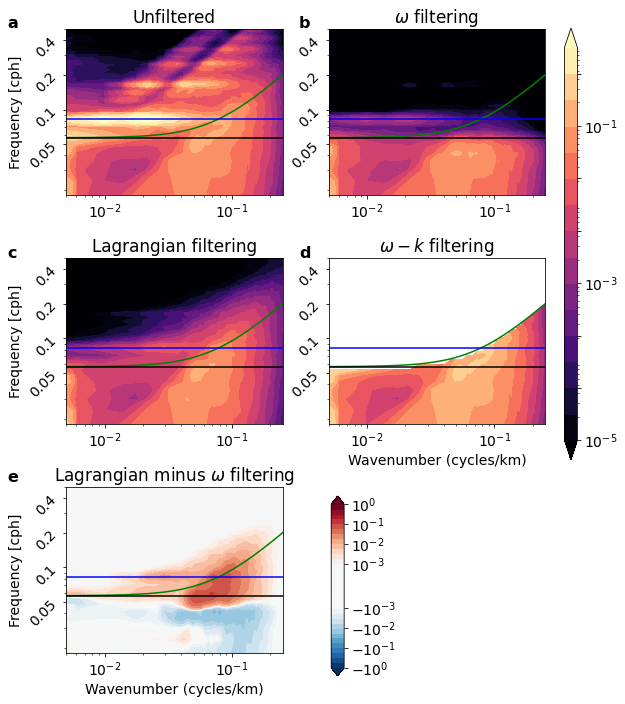

In [25]:
yticks_s = [5*10**-2,10**-1,2*10**-1,4*10**-1]
lev_exp = np.linspace(-5,0,16)
lev = np.power(10, lev_exp)
omega = ps_isoa.freq_time*3600

#lev_exp = np.linspace(-5,-2,16)
#lev = np.power(10, lev_exp)

plt.figure(figsize=(9,10))
plt.subplot(321)
cs = plt.contourf(kr,omega,np.abs(omega)*kr*ps_iso_unfilta,lev,norm=LogNorm(), cmap='magma',extend='both')
#plt.colorbar(cs)


#plt.plot(kr, omegaM[:,5]/np.pi/2, label=i,color='g')
plt.plot(kr, omegaM[:,10]/np.pi/2, label=i,color='g')
#plt.plot(ps_iso.kr.values, omega_disp.values,'k')
plt.xscale('log')
plt.yscale('log')
plt.xlim([0.005, 0.25])
plt.ylim([0.018, 0.5])
plt.ylabel('Frequency [cph]')
#plt.xlabel('Wavenumber (cycles/km)')
plt.tight_layout()
plt.title('Unfiltered')
plt.axhline(-fm/np.pi/2*3600,color='k')
plt.axhline([2/86400*3600],label='Semi-diurnal',color='b')
plt.yticks(yticks_s,yticks_s,rotation=45)

plt.gcf().text(0.02, 0.95, 'a', fontsize = 16,fontweight='bold')

plt.subplot(322)
cs = plt.contourf(kr,omega,np.abs(omega)*kr*ps_iso_eula,lev,norm=LogNorm(), cmap='magma',extend='both')
#plt.colorbar(cs)


#plt.plot(kr, omegaM[:,5]/np.pi/2, label=i,color='g')
plt.plot(kr, omegaM[:,10]/np.pi/2, label=i,color='g')
#plt.plot(ps_iso.kr.values, omega_disp.values,'k')
plt.xscale('log')
plt.yscale('log')
plt.xlim([0.005, 0.25])
plt.ylim([0.018, 0.5])
#plt.ylabel('Frequency [cph]')
#plt.xlabel('Wavenumber (cycles/km)')
plt.tight_layout()
plt.title('$\omega$ filtering')
plt.axhline(-fm/np.pi/2*3600,color='k')
plt.axhline([2/86400*3600],label='Semi-diurnal',color='b')
plt.yticks(yticks_s,yticks_s,rotation=45)

plt.gcf().text(0.47, 0.95, 'b', fontsize = 16,fontweight='bold')


plt.subplot(323)
cs = plt.contourf(kr,omega,np.abs(omega)*kr*ps_isoa,lev,norm=LogNorm(), cmap='magma',extend='both')
#plt.colorbar(cs)


#plt.plot(kr, omegaM[:,5]/np.pi/2, label=i,color='g')
plt.plot(kr, omegaM[:,10]/np.pi/2, label=i,color='g')
#plt.plot(ps_iso.kr.values, omega_disp.values,'k')
plt.xscale('log')
plt.yscale('log')
plt.xlim([0.005, 0.25])
plt.ylim([0.018, 0.5])
plt.ylabel('Frequency [cph]')
#plt.xlabel('Wavenumber (cycles/km)')
plt.tight_layout()
plt.title('Lagrangian filtering')
plt.axhline(-fm/np.pi/2*3600,color='k')
plt.axhline([2/86400*3600],label='Semi-diurnal',color='b')
plt.yticks(yticks_s,yticks_s,rotation=45)

plt.gcf().text(0.02, 0.63, 'c', fontsize = 16,fontweight='bold')

plt.subplot(324)
cs = plt.contourf(kr,omega,np.abs(omega).drop_vars('freq_time')*kr*ps_iso_torresa,lev,norm=LogNorm(), cmap='magma',extend='both')
#plt.colorbar(cs)


#plt.plot(kr, omegaM[:,5]/np.pi/2, label=i,color='g')
plt.plot(kr, omegaM[:,10]/np.pi/2, label=i,color='g')
#plt.plot(ps_iso.kr.values, omega_disp.values,'k')
plt.xscale('log')
plt.yscale('log')
plt.xlim([0.005, 0.25])
plt.ylim([0.018, 0.5])
plt.ylabel('')
plt.xlabel('Wavenumber (cycles/km)')
plt.tight_layout()
plt.title('$\omega-k$ filtering')
plt.axhline(-fm/np.pi/2*3600,color='k')
plt.axhline([2/86400*3600],label='Semi-diurnal',color='b')
plt.yticks(yticks_s,yticks_s,rotation=45)

plt.gcf().text(0.47, 0.63, 'd', fontsize = 16,fontweight='bold')

plt.subplot(325)
from matplotlib import ticker, colors
lev_exp = np.linspace(-4,0,17)
lev = np.concatenate([-np.power(10, lev_exp)[-1::-1], np.power(10, lev_exp)])
cs2 = plt.contourf(kr,omega,np.abs(omega)*kr*(ps_isoa-ps_iso_eula),lev,norm=colors.SymLogNorm(linthresh=10**-3, linscale=10**-3,
                                              vmin=-1.0, vmax=1.0),cmap='RdBu_r',extend='both')


#plt.plot(kr, omegaM[:,5]/np.pi/2, label=i,color='g')
plt.plot(kr, omegaM[:,10]/np.pi/2, label=i,color='g')
#plt.plot(ps_iso.kr.values, omega_disp.values,'k')
plt.xscale('log')
plt.yscale('log')
plt.xlim([0.005, 0.25])
plt.ylim([0.018, 0.5])
plt.ylabel('Frequency [cph]')
plt.xlabel('Wavenumber (cycles/km)')
plt.tight_layout()
plt.title('Lagrangian minus $\omega$ filtering')
plt.axhline(-fm/np.pi/2*3600,color='k')
plt.axhline([2/86400*3600],label='Semi-diurnal',color='b')
plt.yticks(yticks_s,yticks_s,rotation=45)

plt.gcf().text(0.02, 0.32, 'e', fontsize = 16,fontweight='bold')

fig=plt.gcf()
plt.tight_layout()
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, 0.35, 0.02, 0.6])
fig.colorbar(cs, cax=cbar_ax)

cbar_ax = fig.add_axes([0.52, 0.05, 0.02, 0.25])
fig.colorbar(cs2, cax=cbar_ax,ticks=[-10**0, -10**-1, -10**-2, -10**-3, 10**-3, 10**-2, 10**-1,10**0])

fig.savefig('fwn_all_methods_region_A.png')

/home/spencerj/.conda/envs/pangeo2/lib/python3.7/site-packages/ipykernel/__main__.py:11: UserWarning: Log scale: values of z <= 0 have been masked
/home/spencerj/.conda/envs/pangeo2/lib/python3.7/site-packages/ipykernel/__main__.py:33: UserWarning: Log scale: values of z <= 0 have been masked
/home/spencerj/.conda/envs/pangeo2/lib/python3.7/site-packages/ipykernel/__main__.py:55: UserWarning: Log scale: values of z <= 0 have been masked
/home/spencerj/.conda/envs/pangeo2/lib/python3.7/site-packages/ipykernel/__main__.py:77: UserWarning: Log scale: values of z <= 0 have been masked
/home/spencerj/.conda/envs/pangeo2/lib/python3.7/site-packages/ipykernel/__main__.py:103: MatplotlibDeprecationWarning: default base will change from np.e to 10 in 3.4.  To suppress this warning specify the base keyword argument.


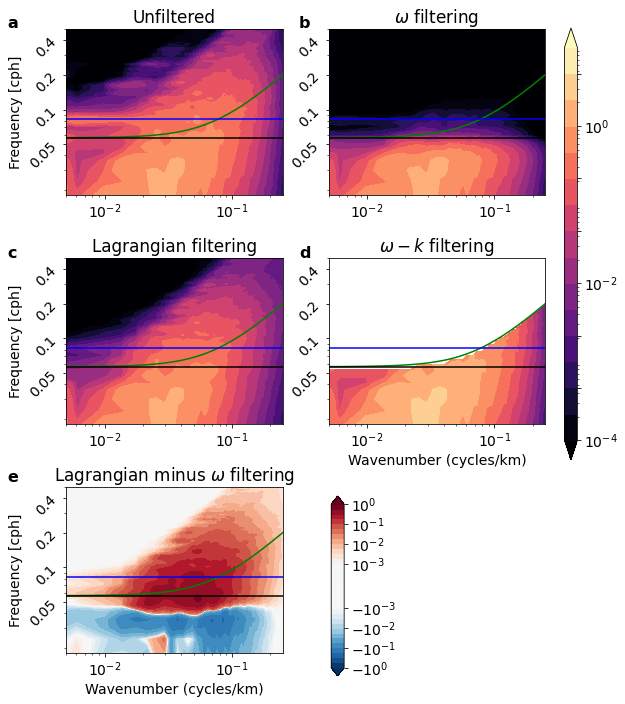

In [26]:
yticks_s = [5*10**-2,10**-1,2*10**-1,4*10**-1]
#lev_exp = np.linspace(-5,0,16)
#lev = np.power(10, lev_exp)
omega = ps_isob.freq_time*3600

lev_exp = np.linspace(-4,1,16)
lev = np.power(10, lev_exp)

plt.figure(figsize=(9,10))
plt.subplot(321)
cs = plt.contourf(kr,omega,np.abs(omega)*kr*ps_iso_unfiltb,lev,norm=LogNorm(), cmap='magma',extend='both')
#plt.colorbar(cs)


#plt.plot(kr, omegaM[:,5]/np.pi/2, label=i,color='g')
plt.plot(kr, omegaM[:,10]/np.pi/2, label=i,color='g')
#plt.plot(ps_iso.kr.values, omega_disp.values,'k')
plt.xscale('log')
plt.yscale('log')
plt.xlim([0.005, 0.25])
plt.ylim([0.018, 0.5])
plt.ylabel('Frequency [cph]')
#plt.xlabel('Wavenumber (cycles/km)')
plt.tight_layout()
plt.title('Unfiltered')
plt.axhline(-fm/np.pi/2*3600,color='k')
plt.axhline([2/86400*3600],label='Semi-diurnal',color='b')
plt.yticks(yticks_s,yticks_s,rotation=45)

plt.gcf().text(0.02, 0.95, 'a', fontsize = 16,fontweight='bold')

plt.subplot(322)
cs = plt.contourf(kr,omega,np.abs(omega)*kr*ps_iso_eulb,lev,norm=LogNorm(), cmap='magma',extend='both')
#plt.colorbar(cs)


#plt.plot(kr, omegaM[:,5]/np.pi/2, label=i,color='g')
plt.plot(kr, omegaM[:,10]/np.pi/2, label=i,color='g')
#plt.plot(ps_iso.kr.values, omega_disp.values,'k')
plt.xscale('log')
plt.yscale('log')
plt.xlim([0.005, 0.25])
plt.ylim([0.018, 0.5])
#plt.ylabel('Frequency [cph]')
#plt.xlabel('Wavenumber (cycles/km)')
plt.tight_layout()
plt.title('$\omega$ filtering')
plt.axhline(-fm/np.pi/2*3600,color='k')
plt.axhline([2/86400*3600],label='Semi-diurnal',color='b')
plt.yticks(yticks_s,yticks_s,rotation=45)

plt.gcf().text(0.47, 0.95, 'b', fontsize = 16,fontweight='bold')

plt.subplot(323)
cs = plt.contourf(kr,omega,np.abs(omega)*kr*ps_isob,lev,norm=LogNorm(), cmap='magma',extend='both')
#plt.colorbar(cs)


#plt.plot(kr, omegaM[:,5]/np.pi/2, label=i,color='g')
plt.plot(kr, omegaM[:,10]/np.pi/2, label=i,color='g')
#plt.plot(ps_iso.kr.values, omega_disp.values,'k')
plt.xscale('log')
plt.yscale('log')
plt.xlim([0.005, 0.25])
plt.ylim([0.018, 0.5])
plt.ylabel('Frequency [cph]')
#plt.xlabel('Wavenumber (cycles/km)')
plt.tight_layout()
plt.title('Lagrangian filtering')
plt.axhline(-fm/np.pi/2*3600,color='k')
plt.axhline([2/86400*3600],label='Semi-diurnal',color='b')
plt.yticks(yticks_s,yticks_s,rotation=45)

plt.gcf().text(0.02, 0.63, 'c', fontsize = 16,fontweight='bold')

plt.subplot(324)
cs = plt.contourf(kr,omega,np.abs(omega).drop_vars('freq_time')*kr*ps_iso_torresb,lev,norm=LogNorm(), cmap='magma',extend='both')
#plt.colorbar(cs)


#plt.plot(kr, omegaM[:,5]/np.pi/2, label=i,color='g')
plt.plot(kr, omegaM[:,10]/np.pi/2, label=i,color='g')
#plt.plot(ps_iso.kr.values, omega_disp.values,'k')
plt.xscale('log')
plt.yscale('log')
plt.xlim([0.005, 0.25])
plt.ylim([0.018, 0.5])
plt.ylabel('')
plt.xlabel('Wavenumber (cycles/km)')
plt.tight_layout()
plt.title('$\omega-k$ filtering')
plt.axhline(-fm/np.pi/2*3600,color='k')
plt.axhline([2/86400*3600],label='Semi-diurnal',color='b')
plt.yticks(yticks_s,yticks_s,rotation=45)

plt.gcf().text(0.47, 0.63, 'd', fontsize = 16,fontweight='bold')

plt.subplot(325)
from matplotlib import ticker, colors
lev_exp = np.linspace(-4,0,17)
lev = np.concatenate([-np.power(10, lev_exp)[-1::-1], np.power(10, lev_exp)])
cs2 = plt.contourf(kr,omega,np.abs(omega)*kr*(ps_isob-ps_iso_eulb),lev,norm=colors.SymLogNorm(linthresh=10**-3, linscale=10**-3,
                                              vmin=-1.0, vmax=1.0),cmap='RdBu_r',extend='both')


#plt.plot(kr, omegaM[:,5]/np.pi/2, label=i,color='g')
plt.plot(kr, omegaM[:,10]/np.pi/2, label=i,color='g')
#plt.plot(ps_iso.kr.values, omega_disp.values,'k')
plt.xscale('log')
plt.yscale('log')
plt.xlim([0.005, 0.25])
plt.ylim([0.018, 0.5])
plt.ylabel('Frequency [cph]')
plt.xlabel('Wavenumber (cycles/km)')
plt.tight_layout()
plt.title('Lagrangian minus $\omega$ filtering')
plt.axhline(-fm/np.pi/2*3600,color='k')
plt.axhline([2/86400*3600],label='Semi-diurnal',color='b')
plt.yticks(yticks_s,yticks_s,rotation=45)

plt.gcf().text(0.02, 0.32, 'e', fontsize = 16,fontweight='bold')

fig=plt.gcf()
plt.tight_layout()
fig.subplots_adjust(right=0.85)
cbar_ax = fig.add_axes([0.88, 0.35, 0.02, 0.6])
fig.colorbar(cs, cax=cbar_ax)

cbar_ax = fig.add_axes([0.52, 0.05, 0.02, 0.25])
fig.colorbar(cs2, cax=cbar_ax,ticks=[-10**0, -10**-1, -10**-2, -10**-3, 10**-3, 10**-2, 10**-1,10**0])

fig.savefig('fwn_all_methods_region_B.png')